# Modeling

(aangepast ter herkansing door Levi Verhoef)

# Inhouds opgaven modeling

## 1. Libraries
## 2. Data Inladen
## 3. Data Retrieval
## 4. Baseline model
## 5. Lineaire regression
## 6. Random forest  regression
## 7. Pessimism Tree Regression


# 1. Libraries

Hier importeren we de benodigde libraries voor de modellen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from collections import Counter
from collections import defaultdict
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# 2. Data Inladen

Hieronder wordt de data ingeladen van uit de notebook Data Preparation

In [2]:
%%capture
%run 3.Data_Preparation.ipynb

In [3]:
prep_list = return_model_data()
table = prep_list[0]
table.head(3)

,#stm_sap_meldnr,stm_sap_meld_ddt,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,...,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur,stm_meld_gebeld_duur,stm_meld_ter_plekken_duur,stm_gebeld_ter_plekken_duur,stm_equipm_soort_mld_looe_mean,stm_techn_mld_looe_mean,pessimism_minutes,pessimism_percentage
32099,50112759,2012-06-12 20:50:00,104.0,104.0,None,None,0.0,0.0,9.0,MAFS,...,0.0,43.0,3.000000e+00,492.0,495.0,3.0,123.195467,122.152655,-3.0,-6.976744
91875,50144448,2016-05-26 14:12:00,104.0,104.0,None,None,55800.0,56100.0,9.0,MAFS,...,0.0,236.0,1.060002e+09,0.0,924.0,924.0,118.984854,110.467426,57.0,24.152542
99101,50147681,2016-09-27 07:47:21,105.0,105.0,None,None,29000.0,29100.0,9.0,MINB,...,0.0,71.0,1.060168e+09,0.0,0.0,0.0,122.520150,124.234074,-52.0,-73.239437


# 3. Data retrieval

Voor het terughalen van de modellen voor de evaluatie is hier een functie die de benodigde modellen retourneert.

In [4]:
def return_models():
    liniar_reg
    return [liniar_reg, random_forest, best_minutes_dtr, y_pred_minutes, best_nodes, prep_list[1]]
# preplist is target encoder

# 4. Baseline model

Hier gebruiken we een dummy regressor als baselinemodel. We gebruiken hiervoor de optie mean, dit geeft altijd de gemiddelde tijdsduur als voorspelling terug. 

In [5]:
#DummyRegressor
X_train, X_test, Y_train, Y_test = train_test_split(table['stm_fh_duur'], table['stm_fh_duur'])

# We nemen de mean om alle data mee te nemen en ook de uitschieters.
BaselineDummyRegressor = DummyRegressor(strategy="mean")
BaselineDummyRegressor.fit(X_train, Y_train)

y_pred = BaselineDummyRegressor.predict(X_test)
accuracy_r2 = BaselineDummyRegressor.score(Y_test, y_pred)

print("Echte waarde: ", Y_test[0:1].values[0])
print("Voorspelde waarde: ", y_pred[0:1][0])
print("RSME: ", np.sqrt(mean_squared_error(y_pred, Y_test)))

Echte waarde:  98.0
Voorspelde waarde:  120.24921158872542
RSME:  79.06282810164878


We kunnen hieruit concluderen dat wanneer de gemiddelde duur wordt gegeven als voorspelling, de foutmarge voor een voorspelling 77 minuten is. Modellen die beter presteren dan dit zijn dus een minimumvereiste.

# 5 Lineaire regression

We hebben hier gebruik gemaakt van lineaire regressie. 
We maken gebruik van de prognose van de functieherstel duur (stm_progfh_in_duur), de 'stm_gebeld_ter_plekken_duur' en de equipmentsoort, encoded met de LOOE encoder.

In [6]:
linreg_table = table[['stm_progfh_in_duur','stm_equipm_soort_mld_looe_mean', 'stm_gebeld_ter_plekken_duur']]
X_train, X_test, Y_train, Y_test = train_test_split(linreg_table, table['stm_fh_duur'])

Er is te zien dat de RSME (root mean squared error) van de hele data set 64 is. Er is dus een verbetering ten opzichte van de baseline.

In [7]:
liniar_reg = LinearRegression()

liniar_reg.fit(X_train,Y_train)

y_pred = liniar_reg.predict(X_test)

accuracy_r2 = r2_score(Y_test, y_pred) 

print("Echte waarde: ", Y_test[0:1].values[0])
print("Voorspelde waarde: ", y_pred[0:1][0])
print("R2: ",  accuracy_r2)
print("RSME: ", np.sqrt(mean_squared_error(y_pred, Y_test)))

Echte waarde:  55.0
Voorspelde waarde:  62.79839831374008
R2:  0.6968783483023089
RSME:  43.27624109370298


Hieronder is de visualisatie van de regressielijn te zien. Op de y-as is de voorspelde tijd te zien en op de x de functie hersteltijd. De rode punten zijn dus voorspelde tijden tenopzichte van hun echte tijd. Er is ook een lichtelijke opgaande lijn te herkennen in de grafiek. Echter presteert dit model met een RMSE van 43 niet geweldig, en valt af te lezen dat veel voorspellingen er compleet naast zitten.

<AxesSubplot:xlabel='stm_fh_duur'>

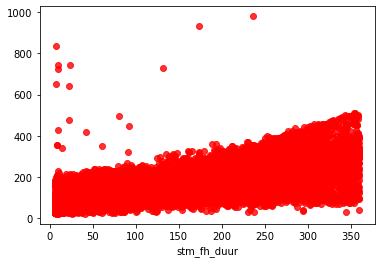

In [8]:
# Prediction tegen eigenlijke uitkomst
sns.regplot(x=Y_test, y=y_pred, ci=None, color="r")

# 6. Random forest  regression

We zijn overgegaan naar een random forest regression model om te kijken of er verbeteringen waren te maken met de uitkomsten. Er wordt hier onder in een lange loop gekeken wat de beste random forest tree zou zijn er wordt gekeken naar verschillende hyperparameters: leaf, split, tree amount en depth gezocht welke combinatie de laagste rsme score heeft.

In [9]:
def find_best_tree(table):
    x_coloms = table[['stm_equipm_soort_mld_looe_mean', 'stm_progfh_in_duur', 'stm_gebeld_ter_plekken_duur']].astype('int64').values
    y_coloms = table['stm_fh_duur'].astype('int64').values

    max_depth = 20
    range_depths = range(max_depth)
    min_leaf = [3, 5, 11, 16, 20]
    min_split = [3,10,15,20]
    n_range = [1,2,3,4,5]

    acc_list = []
    meanscore = 999
    meanscore_label = ""
    best_regessors = []
    for n in n_range:
        for dept in range_depths[1:]:
            for leaf in min_leaf:
                for split in min_split:
                    x_train, x_test, y_train, y_test = train_test_split(x_coloms, y_coloms)
                    random_forest = RandomForestRegressor(n_estimators=n, criterion='mse', max_depth=dept, min_samples_leaf = leaf, min_samples_split = split, n_jobs=-2)
                    random_forest.fit(x_train, y_train)
                    y_pred = random_forest.predict(x_test)

                    mean = np.sqrt(mean_squared_error(y_test, y_pred))
                    if mean < meanscore:
                        meanscore = mean  
                        best_regessors = [random_forest]
                        meanscore_label = ("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)), "R2: ", r2_score(y_test, y_pred), "Tree: ", n, "Depth: ", dept, "Leaf: ", leaf, "Split", split)
       
        print('Complete one', remember)
        remember = remember+1
    print(meanscore_label)
    
# Uncommended voor evaluation import. Duurt te lang
#find_best_tree(table)

Hier onder tonen we de uit komst van het model met de beste hyperparameters. We zien daar bij de predictie, prognose en echte tijdsduur van de storing.

In [10]:
x_coloms = table[['stm_equipm_soort_mld_looe_mean', 'stm_progfh_in_duur', 'stm_gebeld_ter_plekken_duur', 'stm_techn_mld_looe_mean',]].astype('int64')
y_coloms = table['stm_fh_duur'].astype('int64').values

x_train, x_test, y_train, y_test = train_test_split(x_coloms, y_coloms)
random_forest = RandomForestRegressor(n_estimators=5, min_samples_leaf = 11, max_depth=10,  min_samples_split = 3, n_jobs=-2)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

accuracy_r2 = r2_score(y_test, y_pred)

print("Echte waarde: ", Y_test[0:1].values[0])
print("Voorspelde waarde: ", y_pred[0:1][0])
print("Prognose waarde: ", x_coloms['stm_progfh_in_duur'].iloc[0])
print("R2: ",  accuracy_r2)
print("RSME: ", np.sqrt(mean_squared_error(y_pred, y_test)))

Echte waarde:  55.0
Voorspelde waarde:  77.62008743750464
Prognose waarde:  40
R2:  0.753520411321545
RSME:  39.01454792806129


Er is een betere rsme van 39 te zien. In de uitkomst hierboven is er te zien dat de voorspelling ver van de echte waarde ligt in vergelijking tot de prognose. Er dit was helaas al te verwachten met een rsme van 39.

<h1> Pessimism Tree Regression </h1>

In deze paragraaf willen we onderzoeken of we in plaats van de functiehersteltijd misschien het gemiddelde pessimisme van monteurs kunnen voorspellen. Uit dialoog met ProRail kwam naar voren dat monteurs gemiddeld genomen erg pessimistisch zijn met hun prognoses, omdat zij boetes riskeren als zij een prognose geven die zwaar overschreden wordt.

We hebben hiervoor 2 kolommen aangemaakt. Pessimisme gemeten in percentages, en gemeten in minuten.

We verdelen deze dataset op in train en test sets.

In [11]:
copy_table = table.copy()

X = copy_table[['stm_equipm_soort_mld_looe_mean', 'stm_progfh_in_duur', 'stm_gebeld_ter_plekken_duur', 'stm_techn_mld_looe_mean']].dropna()
y = table['pessimism_minutes']
y2 = table['pessimism_percentage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=0)

Hieronder is een functie beschreven die een aantal dingen doet:

1. Initialiseert een DecisionTreeRegressor
2. Kijkt per LEAF naar de RMSE, de predicted value en de percentage samples die in deze leaf eindigen
3. Besluit op basis van deze informatie de beste depth
4. Returned een DecisionTreeRegressor met max_depth gevonden in onderstaande functie

In [12]:
def find_best_depth_regressor(regressor, X_train, y_train, X_test, y_test, leaf_score_target, depths):
    good_results_percentage = 0
    best_depth = 0
    best_nodes = defaultdict(list)
    
    for depth in depths:
        regressor.set_params(max_depth=depth)
        regressor.fit(X_train, y_train)
        
        #get the leaf for each training sample
        leaves_index = regressor.apply(X_train) 
        #use Counter to find the number of elements on each leaf
        cnt = Counter(leaves_index)


        good_nodes = defaultdict(list)
        for (idx, mse, prediction) in zip(cnt.keys(), regressor.tree_.impurity, regressor.tree_.value):
            rmse = np.sqrt(mse)
            if rmse < leaf_score_target:
                good_nodes[idx] += [rmse, prediction[0][0]]
        
        for idx, value in cnt.items():
            percent = value/sum(cnt.values())*100
            if idx in good_nodes.keys():
                good_nodes[idx].append(percent)

        results = [i for i in good_nodes.values() if i[0] != 0.0 and i[2] > 1]
        result_percentage = sum([i[2] for i in results])
        if result_percentage > good_results_percentage:
            best_depth = depth
            good_results_percentage = result_percentage
            best_nodes = good_nodes
        

        if len(results) != 0:
            print(f'At depth {depth}, the interesting results are:')
            for i in results:
                print(f'RMSE:{i[0]}, Prediction: {i[1]}, Percentage: {i[2]}')

    print(f'the best depth: {best_depth}')

    dtr_result = DecisionTreeRegressor(criterion='squared_error',max_depth=best_depth)
    dtr_result.fit(X_train, y_train)
    y_pred = dtr_result.predict(X_test)

    return dtr_result, y_pred, best_nodes




We checken hier eerst de beste depth voor een decision tree regressor voor pessimisme-minuten:

In [13]:
depths_to_check = range(1,25) #depths to search
leaf_score_desired = 20 #leaf score that we desire in RSME
dtr_minutes = DecisionTreeRegressor(random_state=0)
best_minutes_dtr, y_pred_minutes, best_nodes = find_best_depth_regressor(dtr_minutes, X_train, y_train, X_test, y_test, leaf_score_desired, depths_to_check)

At depth 7, the interesting results are:
RMSE:18.19429449959208, Prediction: -3.424788277994354, Percentage: 1.0733267376849274
RMSE:15.902820028515867, Prediction: -16.327984718242597, Percentage: 3.3752847249384534
RMSE:17.022429314298584, Prediction: -30.964351270408656, Percentage: 1.6036628856728714
At depth 8, the interesting results are:
RMSE:15.902820028515867, Prediction: -16.327984718242597, Percentage: 1.1262453121045486
RMSE:13.863070096181662, Prediction: -13.11902985074627, Percentage: 1.436854335871891
RMSE:16.600062265826875, Prediction: -26.776664811723244, Percentage: 1.6836159491981684
RMSE:16.29173760098192, Prediction: -35.51592741935484, Percentage: 1.6237949520281618
RMSE:15.053792160514273, Prediction: -74.19552414605418, Percentage: 1.450659181372662
At depth 9, the interesting results are:
RMSE:17.902279616286084, Prediction: -3.387066415703146, Percentage: 1.2464625083404275
RMSE:13.863070096181662, Prediction: -13.11902985074627, Percentage: 1.37530773301428

We kijken enkel naar leaf nodes met meer dan 1% van de samples en minder dan 25 RSME. Een afwijking van 25 minuten kan eventueel interessant zijn voor een voorspelling - afhankelijk van wat voor soort prognose het is. Verder willen we niet naar te specifieke leaf nodes kijken omdat die mogelijk overfit zijn. 

In [14]:
best_nodes = {k:v for k,v in best_nodes.items() if v[2] > 1}
for key, value in best_nodes.items():
    print(f'Node ID: {key} - RSME: {round(value[0],1)} - Prediction: {round(value[1],2)} pessimism minutes - percentage of total samples: {round(value[2],1)}%')

Node ID: 49 - RSME: 0.0 - Prediction: -284.0 pessimism minutes - percentage of total samples: 1.6%
Node ID: 24 - RSME: 15.9 - Prediction: -16.33 pessimism minutes - percentage of total samples: 1.1%
Node ID: 18 - RSME: 13.9 - Prediction: -13.12 pessimism minutes - percentage of total samples: 1.4%
Node ID: 72 - RSME: 16.6 - Prediction: -26.78 pessimism minutes - percentage of total samples: 1.7%
Node ID: 102 - RSME: 16.3 - Prediction: -35.52 pessimism minutes - percentage of total samples: 1.6%
Node ID: 64 - RSME: 15.1 - Prediction: -74.2 pessimism minutes - percentage of total samples: 1.5%


We kunnen hier aflezen dat er een aantal voorspellingen zijn die een relatief lage RSME hebben vergeleken met onze andere modellen. We kunnen bijvoorbeeld zien dat 1.5% van de test data eindigt in node 64, en dat we daar met een foutmarge van ~15 minuten kunnen voorspellen dat monteurs in die specifieke situatie ~47 minuten te OPTIMISTISCH zijn.

Maar hoe ziet deze situatie er dan uit? Hiervoor heb ik een sample uitgekozen die we als voorbeeld kunnen nemen, om te zien hoe die door de beslisboom gaat. Het gaat om de volgende sample, die in node 64 uitkomt:

In [20]:
X_test.iloc[72:73]

,stm_equipm_soort_mld_looe_mean,stm_progfh_in_duur,stm_gebeld_ter_plekken_duur,stm_techn_mld_looe_mean
259739,119.63293,16.0,94.0,132.018995


Hieronder is een codeblock die het pad van de sample door de decision tree bijhoudt:

In [21]:
n_nodes = best_minutes_dtr.tree_.node_count
children_left = best_minutes_dtr.tree_.children_left
children_right = best_minutes_dtr.tree_.children_right
feature = best_minutes_dtr.tree_.feature
threshold = best_minutes_dtr.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

node_indicator = best_minutes_dtr.decision_path(X_test)
leaf_id = best_minutes_dtr.apply(X_test)

sample_id = 72
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test.iloc[sample_id][feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : Condition to check: {feature} = {value} in this sample "
        "{inequality} treshold: {threshold}".format(
            node=node_id,
            sample=sample_id,
            feature=X_test.keys()[feature[node_id]],
            value=X_test.iloc[sample_id][feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )
print(f'Leaf node : {key} - RSME: {round(value[0],1)} - Prediction: {round(value[1],2)} pessimism minutes - percentage of total samples: {round(value[2],1)}%')

Rules used to predict sample 72:

decision node 0 : Condition to check: stm_gebeld_ter_plekken_duur = 94.0 in this sample <= treshold: 114.5
decision node 1 : Condition to check: stm_progfh_in_duur = 16.0 in this sample <= treshold: 150.5
decision node 2 : Condition to check: stm_gebeld_ter_plekken_duur = 94.0 in this sample > treshold: 53.5
decision node 66 : Condition to check: stm_gebeld_ter_plekken_duur = 94.0 in this sample > treshold: 80.5
decision node 98 : Condition to check: stm_progfh_in_duur = 16.0 in this sample <= treshold: 90.5
decision node 99 : Condition to check: stm_gebeld_ter_plekken_duur = 94.0 in this sample <= treshold: 95.5
decision node 100 : Condition to check: stm_progfh_in_duur = 16.0 in this sample <= treshold: 82.5
decision node 101 : Condition to check: stm_gebeld_ter_plekken_duur = 94.0 in this sample > treshold: 87.5
Leaf node : 64 - RSME: 15.1 - Prediction: -74.2 pessimism minutes - percentage of total samples: 1.5%


We kunnen zien dat in deze beslisboom alleen progfh_in-duur en gebeld_ter_plekken_duur worden gebruikt om de voorspelling te doen. Er zijn een aantal beslispunten die er toe leiden dat deze sample in deze specifieke leaf terechtkomt.

Er was ook nog het idee om percentages te gebruiken, maar uit initieel onderzoek is gebleken dat deze twee modellen exact hetzeflde pad volgen binnen een regressor. Dat heeft dus niet zoveel zin - het is handiger om de voorspelling in minuten te houden.

De resultaten van onze predictions slaan we op in deze dataframe:

In [17]:
results_df = pd.DataFrame(y_test.copy())
results_df['prediction'] = y_pred_minutes.tolist()
results_df['diff'] = abs(results_df['pessimism_minutes'] - results_df['prediction'])

In [18]:
results_df

,pessimism_minutes,prediction,diff
254743,-107.0,-21.514045,85.485955
511749,31.0,83.338889,52.338889
262183,55.0,3.067654,51.932346
595037,199.0,99.522727,99.477273
546845,-52.0,-46.619088,5.380912
...,...,...,...
895867,-1.0,116.380744,117.380744
714449,-37.0,-23.754121,13.245879
769752,-116.0,-43.929817,72.070183
812251,-93.0,-12.838247,80.161753


Hier plot ik de beslisboom, wees gewaarschuwd, deze beslisboom is bijzonder groot. Dit is puur ter visualisatie

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.513493 to fit


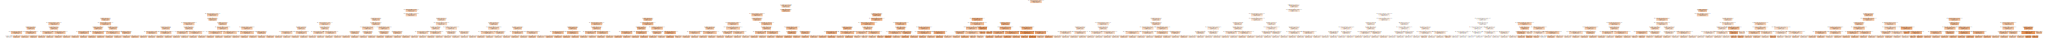

In [19]:
# DOT data
dot_data = tree.export_graphviz(best_minutes_dtr, out_file=None, 
                                feature_names=['stm_equipm_soort_mld_looe_mean', 'stm_progfh_in_duur', 'stm_gebeld_ter_plekken_duur', 'stm_techn_mld_looe_mean'],proportion=True,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render(directory='doctest-output', view=True)
graph
  